<a href="https://colab.research.google.com/github/VindhyaHV/Python_ML_CaseStudy/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv('GOOGL CSV.csv')

In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,8/19/2004,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,8/20/2004,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,8/23/2004,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,8/24/2004,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,8/25/2004,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4401,2/10/2022,2794.070068,2829.689941,2759.139893,2772.399902,2772.399902,1966500
4402,2/11/2022,2772.000000,2783.129883,2668.000000,2685.649902,2685.649902,1994200
4403,2/14/2022,2665.129883,2726.000000,2665.129883,2710.520020,2710.520020,1713900
4404,2/15/2022,2751.409912,2762.169922,2716.429932,2732.169922,2732.169922,1334000


We can observe that its a time series data

In [ ]:
target = data['High']
target.value_counts()

950.000000     3
548.000000     3
236.736740     3
195.195190     3
565.000000     3
              ..
229.134140     1
228.858856     1
230.225220     1
230.110107     1
2740.610107    1
Name: High, Length: 4258, dtype: int64

In [ ]:
dataA = data.drop(labels = ['High'],axis = 1)
dataB = data.drop(labels = ['Low'],axis = 1)

In [ ]:
#Checking for duplicates
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
#checking correlation btw features
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999921,0.999905,0.999822,0.999822,-0.455981
High,0.999921,1.000000,0.999880,0.999907,0.999907,-0.455030
Low,0.999905,0.999880,1.000000,0.999920,0.999920,-0.457492
Close,0.999822,0.999907,0.999920,1.000000,1.000000,-0.456380
Adj Close,0.999822,0.999907,0.999920,1.000000,1.000000,-0.456380
Volume,-0.455981,-0.455030,-0.457492,-0.456380,-0.456380,1.000000


We can observe that Except Volume, all the features are highly correlated

Adj Close 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#checking mean , std , min etc
data['Adj Close'].describe()

count    4406.000000
mean      681.950130
std       629.734137
min        50.055054
25%       247.757752
50%       430.450454
75%       992.279999
max      2996.770020
Name: Adj Close, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


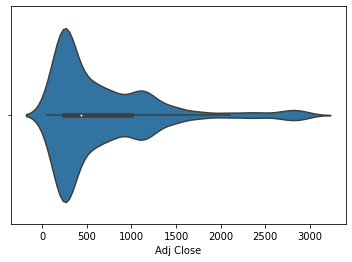

In [ ]:
sns.violinplot(data['Adj Close'])
plt.show()

Close

In [ ]:
data['Close'].describe()

count    4406.000000
mean      681.950130
std       629.734137
min        50.055054
25%       247.757752
50%       430.450454
75%       992.279999
max      2996.770020
Name: Close, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


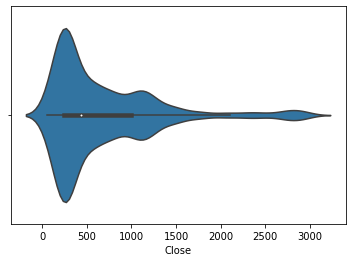

In [ ]:
sns.violinplot(data['Close'])
plt.show()

Open

In [ ]:
data['Open'].describe()

count    4406.000000
mean      681.951261
std       629.705043
min        49.644646
25%       247.935428
50%       431.378875
75%       993.699982
max      3025.000000
Name: Open, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


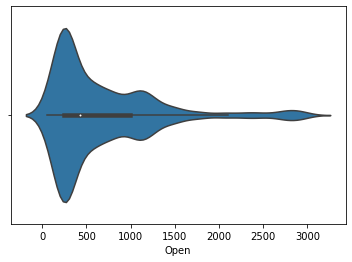

In [ ]:
sns.violinplot(data['Open'])
plt.show()

Volume

In [ ]:
data['Volume'].describe()

count    4.406000e+03
mean     6.471553e+06
std      7.703985e+06
min      4.656000e+05
25%      1.697800e+06
50%      3.803497e+06
75%      8.075466e+06
max      8.215117e+07
Name: Volume, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


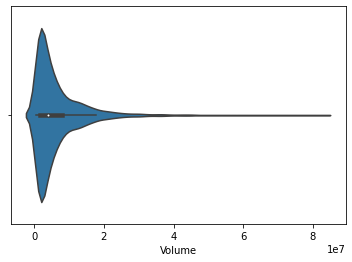

In [ ]:
sns.violinplot(data['Volume'])
plt.show()

Volume feature has wide range

Date Feature

In [ ]:
import regex as re
#transforming feature
data['Date']
date = [i.split('/') for i in data['Date']]
data['MM'] = [i[0] for i in date]
data['DD'] = [i[1] for i in date]
data['YYYY'] = [i[2] for i in date]

In [ ]:
data = data.drop(labels=['Date'],axis=1)

In [ ]:
dataA = data.drop(labels = ['High'],axis = 1)
dataB = data.drop(labels = ['Low'],axis = 1)
targetA = data['High']
targetB = data['Low']

In [ ]:
from sklearn.model_selection import train_test_split
trainA = dataA.iloc[0:3000,:]
testA = dataA.iloc[3000:,:]
y_trainA = targetA[0:3000]
y_testA = targetA[3000:]

trainB = dataB.iloc[0:3000,:]
testB = dataB.iloc[3000:,:]
y_trainB = targetB[0:3000]
y_testB = targetB[3000:]

LinearRegression

Set A - predicting High Value

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
model = LinearRegression()
model.fit(trainA,y_trainA)
y_testA_pred = model.predict(testA)
print(type(y_testA_pred))
print(len(y_testA))

<class 'numpy.ndarray'>
1406


In [ ]:
# MSE 
y_testA = list(y_testA)
sum = 0
for i in range(len(y_testA)):
  sum+=(y_testA[i]-y_testA_pred[i])**2
MSE = 1/len(y_testA)*(sum)

print('MSE setA:',MSE)

MSE setA: 84.24376060304019


SetB - Predicting Low Value

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
model = LinearRegression()
model.fit(trainB,y_trainB)
y_testB_pred = model.predict(testB)
print(type(y_testB_pred))
print(len(y_testB))

# MSE 
y_testB = list(y_testB)
sum = 0
for i in range(len(y_testB)):
  sum+=(y_testB[i]-y_testB_pred[i])**2
MSE = 1/len(y_testB)*(sum)

print('MSE setB :',MSE)

<class 'numpy.ndarray'>
1406
MSE setB : 76.29541241699177


Random Forest

setA

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(trainA,y_trainA)
y_testA_pred = model.predict(testA)
#print(type(y_testA_pred))
#print(len(y_testA))

# MSE 
y_testA = list(y_testA)
sum = 0
for i in range(len(y_testA)):
  sum+=(y_testA[i]-y_testA_pred[i])**2
MSE = 1/len(y_testA)*(sum)

print('MSE setA Random Forest:',MSE)

MSE setA Random Forest: 785325.8401205895


setB

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
model = RandomForestRegressor()
model.fit(trainB,y_trainA)
y_testB_pred = model.predict(testB)

# MSE 
y_testB = list(y_testB)
sum = 0
for i in range(len(y_testB)):
  sum+=(y_testB[i]-y_testB_pred[i])**2
MSE = 1/len(y_testB)*(sum)

print('MSE setB :',MSE)

MSE setB : 734775.9332816395


Lets improve Linear Regression Model

Feature Engineering

In [ ]:
import numpy as np
def split_features(column):
  a = [np.round(i) for i in column]
  b = [i%np.floor(i) for i in column]
  return a,b

In [ ]:
dataA = data.drop(labels = ['High'],axis = 1)
dataB = data.drop(labels = ['Low'],axis = 1)
targetA = data['High']
targetB = data['Low']

In [ ]:
openA , openB = split_features(data['Open'])
highA , highB = split_features(data['High'])
lowA , lowB = split_features(data['Low'])
closeA,closeB = split_features(data['Close'])
adjA , adjB = split_features(data['Adj Close'])

In [ ]:
data['openA'],data['openB'] = openA , openB
data['highA'],data['highB'] = highA , highB
data['lowA'],data['lowB'] = lowA , lowB
data['closeA'],data['closeB'] = closeA , closeB
data['adjA'] , data['adjB'] = adjA , adjB


In [ ]:
df = data.drop(labels = ['Open','High','Low','Close','Adj Close'], axis = True)

In [ ]:
dataA = df.drop(labels = ['highA','highB'],axis = 1)
dataB = df.drop(labels = ['lowA','lowB'],axis = 1)
targetA = data['High']
targetB = data['Low']

In [ ]:
from sklearn.model_selection import train_test_split
trainA = dataA.iloc[0:3000,:]
testA = dataA.iloc[3000:,:]
y_trainA = targetA[0:3000]
y_testA = targetA[3000:]

trainB = dataB.iloc[0:3000,:]
testB = dataB.iloc[3000:,:]
y_trainB = targetB[0:3000]
y_testB = targetB[3000:]

Linear Regression

setA

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
model = LinearRegression()
model.fit(trainA,y_trainA)
y_testA_pred = model.predict(testA)
print(type(y_testA_pred))
print(len(y_testA))

# MSE 
y_testA = list(y_testA)
sum = 0
for i in range(len(y_testA)):
  sum+=(y_testA[i]-y_testA_pred[i])**2
MSE = 1/len(y_testA)*(sum)

print('MSE setA:',MSE)

<class 'numpy.ndarray'>
1406
MSE setA: 84.63234453721245


In [ ]:
error = y_testA - y_testA_pred

Text(0, 0.5, 'y_test_pred')

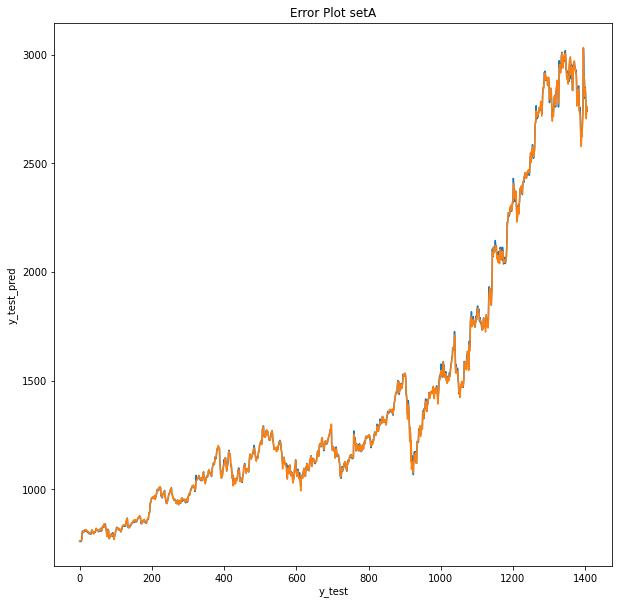

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(y_testA)
plt.plot(y_testA_pred)
plt.title('Error Plot setA')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

setB

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
model = LinearRegression()
model.fit(trainB,y_trainB)
y_testB_pred = model.predict(testB)
print(type(y_testB_pred))
print(len(y_testB))

# MSE 
y_testB = list(y_testB)
sum = 0
for i in range(len(y_testB)):
  sum+=(y_testB[i]-y_testB_pred[i])**2
MSE = 1/len(y_testB)*(sum)

print('MSE setB :',MSE)

<class 'numpy.ndarray'>
1406
MSE setB : 76.3784144062654


Text(0, 0.5, 'y_test_pred')

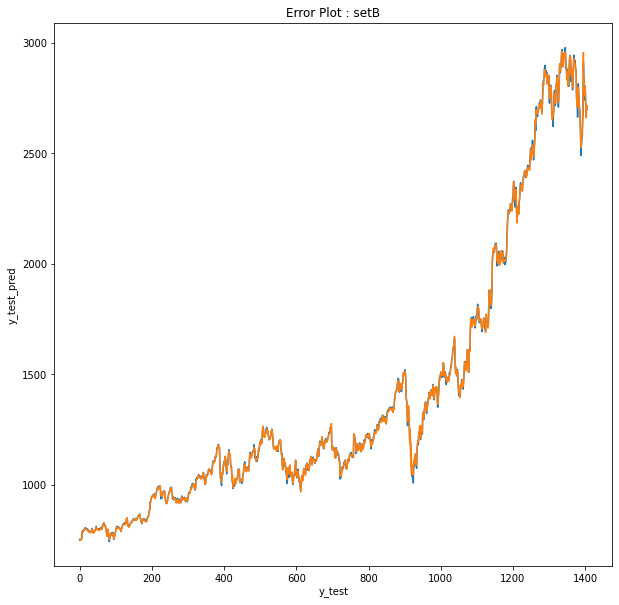

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(y_testB)
plt.plot(y_testB_pred)
plt.title('Error Plot : setB')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

Text(0, 0.5, 'y_test_pred')

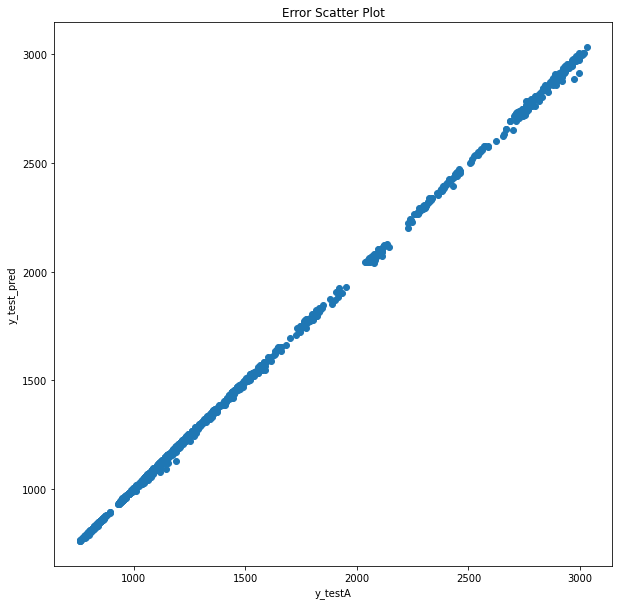

In [ ]:

plt.figure(figsize=(10,10))
plt.title('Error Scatter Plot')
plt.scatter(y_testA,y_testA_pred)
plt.xlabel('y_testA')
plt.ylabel('y_test_pred')

Text(0, 0.5, 'y_testB_pred')

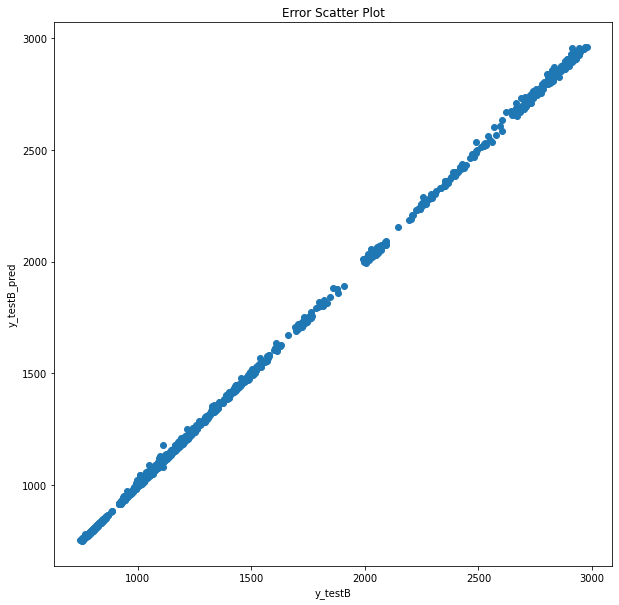

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Error Scatter Plot')
plt.scatter(y_testB,y_testB_pred)
plt.xlabel('y_testB')
plt.ylabel('y_testB_pred')

Feature Engineering

In [ ]:
df['Volume_log'] = df['Volume'].apply(lambda x:np.log(x))

Adding Date Feature

In [ ]:
#we can see that the date starts from 19th August 2004,
# ie Thursday , we can label the data using this Day imformation

#  0 - thursday , 1- friday , 2 - saturday, 3 - sunday , 4- monday , 5 - tuesday , 6 - wednesday ,
day = []
cnt = 0
j = 0
for i in range(len(df)):
  day.append(j)
  j+=1
  cnt+=1
  if cnt == 7:
    j = 0
    cnt = 0

df['Day'] = day

Rounding decimal value by 2

In [ ]:
df['lowB'] = np.round(df['lowB'],2)
df['highB'] = np.round(df['highB'],2)
df['openB'] = np.round(df['openB'],2)
df['adjB'] = np.round(df['adjB'],2)
df['closeB'] = np.round(df['closeB'],2)
df['Volume_log'] = np.round(df['Volume_log'],2)

In [ ]:
df['V1'] = df['Volume'].apply(lambda x : np.cos(x))
df['V2'] = df['Volume'].apply(lambda x : np.sin(x))
df['V3'] = df['Volume'].apply(lambda x : np.log2(x))
Volume = df['Volume']
df.drop(labels='Volume',axis=1,inplace=True)
df['V4'] = (df['openA']+df['closeA'])/2
df['V5'] = (df['openB']+df['closeB'])/2
df['V6'] = np.sin(Volume)**2
df['V7'] = np.cos(Volume)**2
df['V8'] = np.log2(Volume)**2
df['V9'] = np.log2(Volume)**3

In [ ]:
dataA = df.drop(labels = ['highA','highB'],axis = 1)
dataB = df.drop(labels = ['lowA','lowB'],axis = 1)
targetA = data['High']
targetB = data['Low']

from sklearn.model_selection import train_test_split
trainA = dataA.iloc[0:3000,:]
testA = dataA.iloc[3000:,:]
y_trainA = targetA[0:3000]
y_testA = targetA[3000:]

trainB = dataB.iloc[0:3000,:]
testB = dataB.iloc[3000:,:]
y_trainB = targetB[0:3000]
y_testB = targetB[3000:]

SetA

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(trainA,y_trainA)
y_testA_pred = model.predict(testA)
print(type(y_testA_pred))
print(len(y_testA))

# MSE 
y_testA = list(y_testA)
sum = 0
for i in range(len(y_testA)):
  sum+=(y_testA[i]-y_testA_pred[i])**2
MSE = 1/len(y_testA)*(sum)

print('MSE setA:',MSE)

<class 'numpy.ndarray'>
1406
MSE setA: 75.90741921065161


setB

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
model = LinearRegression()
model.fit(trainB,y_trainB)
y_testB_pred = model.predict(testB)
print(type(y_testB_pred))
print(len(y_testB))

# MSE 
y_testB = list(y_testB)
sum = 0
for i in range(len(y_testB)):
  sum+=(y_testB[i]-y_testB_pred[i])**2
MSE = 1/len(y_testB)*(sum)

print('MSE setB :',MSE)

<class 'numpy.ndarray'>
1406
MSE setB : 77.22276882028312


In [ ]:
df

,MM,DD,YYYY,openA,openB,highA,highB,lowA,lowB,closeA,...,Day,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,8,19,2004,50.0,0.05,52.0,0.08,48.0,0.03,50.0,...,0,0.739274,-0.673405,25.412451,50.0,0.135,0.453475,0.546525,645.792651,16411.173919
1,8,20,2004,51.0,0.56,55.0,0.59,50.0,0.30,54.0,...,1,-0.928135,-0.372244,24.444702,52.5,0.385,0.138566,0.861434,597.543453,14606.771612
2,8,23,2004,55.0,0.43,57.0,0.80,55.0,0.58,55.0,...,2,-0.341052,-0.940045,24.121877,55.0,0.590,0.883684,0.116316,581.864965,14035.675310
3,8,24,2004,56.0,0.68,56.0,0.86,52.0,0.84,52.0,...,3,0.946008,0.324143,23.862054,54.0,0.585,0.105069,0.894931,569.397619,13586.996709
4,8,25,2004,53.0,0.53,54.0,0.05,52.0,0.99,53.0,...,4,-0.900512,0.434831,23.131414,53.0,0.290,0.189078,0.810922,535.062311,12376.747810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4401,2,10,2022,2794.0,0.07,2830.0,0.69,2759.0,0.14,2772.0,...,5,0.335246,0.942130,20.907199,2783.0,0.235,0.887610,0.112390,437.110960,9138.765715
4402,2,11,2022,2772.0,0.00,2783.0,0.13,2668.0,0.00,2686.0,...,6,0.233530,-0.972350,20.927379,2729.0,0.325,0.945464,0.054536,437.955178,9165.253858
4403,2,14,2022,2665.0,0.13,2726.0,0.00,2665.0,0.13,2711.0,...,0,-0.551828,-0.833958,20.708852,2688.0,0.325,0.695486,0.304514,428.856531,8881.126210
4404,2,15,2022,2751.0,0.41,2762.0,0.17,2716.0,0.43,2732.0,...,1,-0.344144,-0.938917,20.347327,2741.5,0.290,0.881565,0.118435,414.013726,8424.072756


Observations
1. The Model is Time Series Data
2. Data is falling on a straight line , Thats why picking LinearRegression is the best choice
3. Initially setA and setB are having MSE values 84 and 76 respectively 
4. After adding new features and doing feature Transformation MSE of set a improved to 76 and set B 77. 
5. Extra 17 features are added to improve model performance  
6. MSE can further be improved by adding some more features and doing feature selection.